In [7]:
from obspy import read
import SeisRoutine.plot as srp

In [8]:
st = read()
t = st[0].stats.starttime
picks = {'P': {'DL': (t+5).datetime,
              'Manual': t+5.5},
         'S': {'DL': t+6,
              'Manual': t+6.5}
}
linestyles = {'DL': ':', 'Man': 'solid'}
colors = {'P': 'b', 'S': 'r'}
kwargs = {'figsize': (7, 3)}

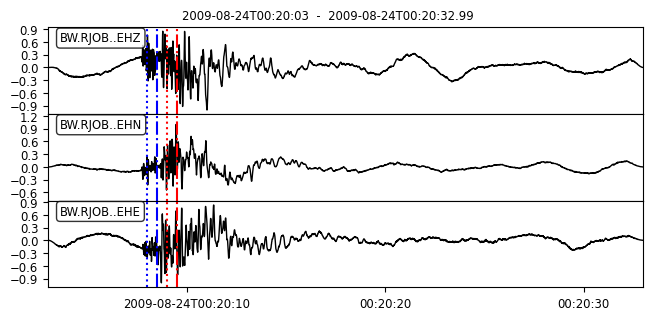

In [9]:
srp.picks_on_station_stream(st, picks, linestyles, colors, **kwargs)

In [10]:
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
from obspy import Trace
from obspy import Stream
import  SeisRoutine.waveform as srw

In [11]:
st = read()
st.filter('highpass', freq=2)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

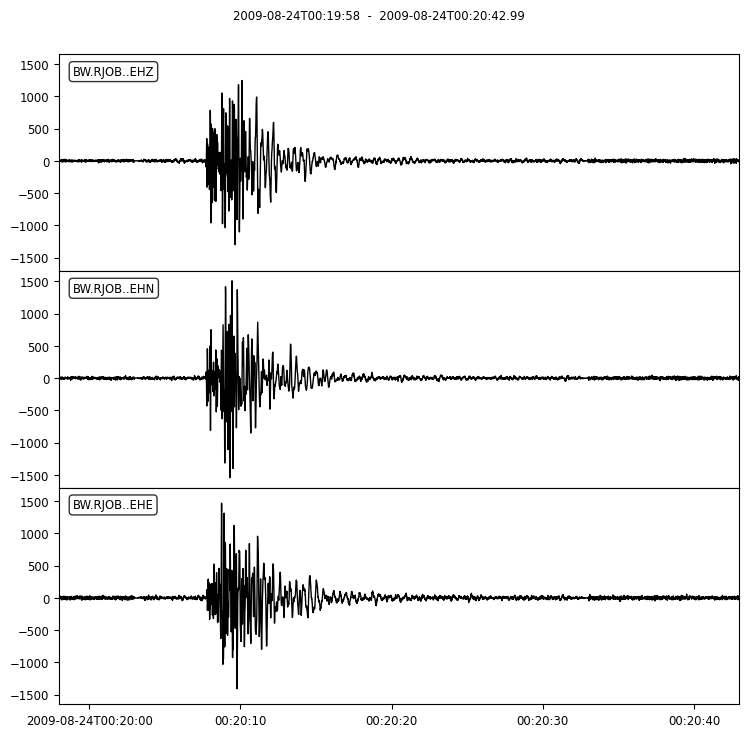

In [12]:
ts = st[0].stats.starttime
te = st[0].stats.endtime
st_new = srw.st_noise_padding(st, stime=5, etime=10)
fig = st_new.plot()

# Reconstruction

In [ ]:
def sine_wave(frequency, amplitude, duration, sampling_rate):
    times = np.arange(0, duration, 1/sampling_rate)
    ampls = amplitude * np.sin(2 * np.pi * frequency * times)
    return times, ampls
# sinu signal
frequency=1
amplitude=1
frequency = np.array([10, 20, 50]).reshape(3, 1)
amplitude = np.array([1, 1, 1]).reshape(3, 1)
duration=10
sampling_rate=5
t_sn, a_sn = sine_wave(frequency=frequency,
                       amplitude=amplitude,
                       duration=duration,
                       sampling_rate=sampling_rate)
a_sn = a_sn[0] + a_sn[1] + a_sn[2]

In [ ]:
from obspy import Trace, Stream

tr = Trace(data=a_sn, header={'sampling_rate': sampling_rate,
                              'station': '001',
                              'network': 'IR',
                              'channel': 'HHZ'})
fig = tr.plot()